# Quand les objets se ressemblent

Dans le monde de la programmation, le code dupliqué est considéré comme mauvais. Nous ne devrions pas avoir plusieurs copies du même code ou d'un code similaire à différents endroits. 

Lorsque nous corrigeons un bogue dans une copie et ne parvenons pas à corriger le même bogue dans une autre copie, nous nous causons des problèmes sans fin. Il existe de nombreuses façons de fusionner des morceaux de code ou des objets ayant une fonctionnalité similaire. 

Dans ce guide, nous aborderons le principe orienté objet le plus connu : l'héritage. Comme discuté dans le guide 1, Conception Orientée Objet, l'héritage nous permet de créer des relations « est-un » entre deux ou plusieurs classes, en faisant abstraction de la logique commune en superclasses et en étendant la superclasse avec des détails spécifiques dans chaque sous-classe. En particulier, nous couvrirons la syntaxe et les principes Python pour les éléments suivants : 

* Héritage de base 
* Héritage de types intégrés 
* Héritage multiple 
* Polymorphisme et typage de canard 

## Héritage de base

Techniquement, chaque classe que nous créons utilise l'héritage. Toutes les classes Python sont des sous-classes de la classe intégrée spéciale nommée object. Cette classe fournit un peu de métadonnées et quelques comportements intégrés afin que Python puisse traiter tous les objets de manière cohérente.

 Si nous n'héritons pas explicitement d'une classe différente, nos classes hériteront automatiquement de l'objet. Cependant, nous pouvons affirmer de manière redondante que notre classe dérive de l'objet en utilisant la syntaxe suivante

In [ ]:
class MySubClass(object):     
  pass

C'est l'héritage !, Les objets en Python. En Python 3, toutes les classes héritent automatiquement de l'objet si nous ne fournissons pas explicitement une superclasse différente. Les superclasses, ou classes parentes, dans la relation sont les classes héritées de l'objet dans cet exemple. Une sous-classe – MySubClass, dans cet exemple – hérite d'une superclasse. Une sous-classe est également dite dérivée de sa classe parente, ou la sous-classe étend la classe parente. Comme vous l'avez probablement compris à partir de l'exemple, l'héritage nécessite une quantité minimale de syntaxe supplémentaire par rapport à une définition de classe de base. 

Incluez simplement le nom de la classe parente entre parenthèses entre le nom de la classe et les deux points qui suivent. C'est tout ce que nous avons à faire pour dire à Python que la nouvelle classe doit être dérivée de la superclasse donnée. Comment appliquons-nous l'héritage en pratique ?

 L'utilisation la plus simple et la plus évidente de l'héritage est d'ajouter des fonctionnalités à une classe existante. Commençons par un gestionnaire de contacts qui suit les noms et adresses e-mail de plusieurs personnes. La classe Contact est chargée de maintenir une liste globale de tous les contacts jamais vus dans une variable de classe et d'initialiser le nom et l'adresse d'un contact individuel :

In [ ]:
class Contact:   
  all_contacts = []   
  
  def __init__(self, name: str, email: str) -> None:       
    self.name = name       
    self.email = email       
    Contact.all_contacts.append(self)   
  
  def __repr__(self) -> str:       
    return (           
        f"{self.__class__.__name__}("
        f"{self.name!r}, {self.email!r}"           
        f")"      
        )

Cet exemple nous présente les variables de classe. La liste all_contacts, car elle fait partie de la définition de classe, est partagée par toutes les instances de cette classe. Cela signifie qu'il n'y a qu'une seule liste Contact.all_contacts. Nous pouvons également y accéder en tant que self.all_contacts depuis n'importe quelle méthode sur une instance de la classe Contact. Si un champ est introuvable sur l'objet (via self), alors il sera trouvé sur la classe et fera donc référence à la même unique liste

In [ ]:
c_1 = Contact("Dusty", "dusty@example.com")
c_2 = Contact("Steve", "steve@itmaybeahack.com")

Contact.all_contacts

[Contact('Dusty', 'dusty@example.com'),
 Contact('Steve', 'steve@itmaybeahack.com')]

Nous avons créé deux instances de la classe Contact et les avons affectées aux variables c_1 et c_2. Lorsque nous avons examiné la variable de classe Contact.all_contacts, nous avons vu que la liste a été mise à jour pour suivre les deux objets. 

Il s'agit d'une classe simple qui nous permet de suivre quelques données sur chaque contact. Mais que se passe-t-il si certains de nos contacts sont également des fournisseurs auprès desquels nous devons commander des fournitures ? Nous pourrions ajouter une méthode de commande à la classe Contact, mais cela permettrait aux gens de commander accidentellement des choses à des contacts qui sont des clients ou des amis de la famille. 

Au lieu de cela, créons une nouvelle classe Supplier qui agit comme notre classe Contact, mais qui a une méthode de commande supplémentaire qui accepte un objet Order à définir.

In [ ]:
class Supplier(Contact):   
  def order(self, order: "Order") -> None:       
    print(           
        "If this were a real system we would send "           
        f"'{order}' order to '{self.name}'"       
        )

Maintenant, si nous testons cette classe dans notre fidèle interpréteur, nous voyons que tous les contacts, y compris les fournisseurs, acceptent un nom et une adresse e-mail dans leur méthode __init__(), mais que seules les instances Supplier ont une méthode order()

In [ ]:
c = Contact("Some Body", "somebody@example.net")
s = Supplier("Sup Plier", "supplier@example.net")

print(c.name, c.email, s.name, s.email)

from pprint import pprint

pprint(c.all_contacts )

Some Body somebody@example.net Sup Plier supplier@example.net
[Contact('Some Body', 'somebody@example.net'),
 Supplier('Sup Plier', 'supplier@example.net')]


In [ ]:
c.order("I need pliers")

AttributeError: ignored

In [ ]:
s.order("I need pliers")

If this were a real system we would send 'I need pliers' order to 'Sup Plier'


Notre classe Supplier peut faire tout ce qu'un contact peut faire (y compris s'ajouter à la liste de Contact.all_contacts) et toutes les choses spéciales qu'il doit gérer en tant que fournisseur. C'est la beauté de l'héritage. Notez également que Contact.all_contacts a collecté chaque instance de la classe Contact ainsi que la sous-classe Supplier. Si nous utilisions self.all_contacts, cela ne collecterait pas tous les objets dans la classe Contact, mais mettrait les instances Supplier dans Supplier.all_contacts

## Extension des fonctions intégrées

Une utilisation intéressante de ce type d'héritage consiste à ajouter des fonctionnalités aux classes intégrées. 

Dans la classe Contact vue plus haut, nous ajoutons des contacts à une liste de tous les contacts. Et si nous voulions également rechercher cette liste par nom ? Eh bien, nous pourrions ajouter une méthode sur la classe Contact pour la rechercher, mais il semble que cette méthode appartient en fait à la liste elle-même.

L'exemple suivant montre comment procéder en utilisant l'héritage d'un type intégré. Dans ce cas, nous utilisons le type de liste. Nous allons informer mypy que notre liste ne contient que des instances de la classe Contact en utilisant list["Contact"]. Pour que cette syntaxe fonctionne dans Python 3.9, nous devons également importer le module d'annotations du package __future__. Les dénitions ressemblent à ceci

In [ ]:
from __future__ import annotations
from typing import *

## Extending built-ins


class ContactList(List["Contact"]):
    def search(self, name: str) -> List["Contact"]:
        """All Contacts with name that contains the name parameter's value."""
        matching_contacts: List["Contact"] = []
        for contact in self:
            if name in contact.name:
                matching_contacts.append(contact)
        return matching_contacts


class Contact:
    all_contacts = ContactList()

    def __init__(self, name: str, email: str) -> None:
        self.name = name
        self.email = email
        Contact.all_contacts.append(self)

    def __repr__(self) -> str:
        return f"{self.__class__.__name__}(" f"{self.name!r}, {self.email!r}" f")"


class Supplier(Contact):
    def order(self, order: "Order") -> None:
        print(
            "If this were a real system we would send "
            f"'{order}' order to '{self.name}'"
        )


Au lieu d'instancier une liste générique en tant que variable de classe, nous créons une nouvelle classe ContactList qui étend le type de données de liste intégré. Ensuite, nous instancions cette sous-classe en tant que liste all_contacts. Nous pouvons tester la nouvelle fonctionnalité de recherche comme suit

In [ ]:
c1 = Contact("John A", "johna@example.net")
c2 = Contact("John B", "johnb@sloop.net")
c3 = Contact("Jenna C", "cutty@sark.io")
[c.name for c in Contact.all_contacts.search('John')]

['John A', 'John B']

Nous avons deux façons de créer des objets de liste génériques. Avec les conseils de type, nous avons une autre façon de parler des listes, distincte de la création d'instances de liste réelles. Premièrement, la création d'une liste avec [] est en fait un raccourci pour créer une liste à l'aide de list(); les deux syntaxes se comportent de manière identique

In [ ]:
[] == list()

True

Le [] est court et doux. Nous pouvons l'appeler sucre syntaxique ; c'est un appel au constructeur list(), écrit avec deux caractères au lieu de six. 

Le nom de la liste fait référence à un type de données : c'est une classe que nous pouvons étendre. Des outils comme mypy peuvent vérifier le corps de la méthode ContactList.search() pour s'assurer qu'elle va vraiment créer une instance de liste remplie d'objets Contact. 

Assurez-vous d'avoir installé une version 0.812 ou plus récente ; les anciennes versions de mypy ne gèrent pas complètement ces annotations basées sur des types génériques. Étant donné que nous avons fourni la définition de la classe Contact après la définition de la classe ContactList, nous avons dû fournir la référence à une classe non encore définie. class comme une chaîne, list["Contact"]. Il est souvent plus courant de fournir d'abord la définition de la classe d'éléments individuels, et la collection peut ensuite faire référence à la classe définie par son nom sans utiliser de chaîne. 

Comme deuxième exemple, nous pouvons étendre la classe dict, qui est une collection de clés et de leurs valeurs associées. Nous pouvons créer des instances de dictionnaires en utilisant la syntaxe {} sugar. Voici un dictionnaire étendu qui suit la clé la plus longue qu'il a vue

In [ ]:
class LongNameDict(Dict[str, int]):
    def longest_key(self) -> Optional[str]:
        """In effect, max(self, key=len), but less obscure"""
        longest = None
        for key in self:
            if longest is None or len(key) > len(longest):
                longest = key
        return longest

## Surcharge et super, 

l'héritage est idéal pour ajouter un nouveau comportement aux classes existantes, mais qu'en est-il du changement de comportement ? 

Notre classe Contact n'autorise qu'un nom et une adresse e-mail. Cela peut suffire pour la plupart des contacts, mais que se passe-t-il si nous voulons ajouter un numéro de téléphone pour nos amis proches ? Objets en Python, nous pouvons le faire facilement en définissant un attribut de téléphone sur le contact après il est construit. Mais si nous voulons rendre cette troisième variable disponible à l'initialisation, nous devons surcharger la méthode __init__(). 

Surcharger signifie modifier ou remplacer une méthode de la superclasse par une nouvelle méthode (avec le même nom) dans la sous-classe. Aucune syntaxe spéciale n'est nécessaire pour cela ; la méthode nouvellement créée de la sous-classe est automatiquement appelée à la place de la méthode de la superclasse, comme indiqué dans le code suivant

In [ ]:
class Friend(Contact):    
  def __init__(self, name: str, email: str, phone: str) -> None:        
    self.name = name        
    self.email = email        
    self.phone = phone

N'importe quelle méthode peut être remplacée, pas seulement __init__(). Avant de continuer, cependant, nous devons résoudre certains problèmes dans cet exemple. 

Nos classes Contact et Friend ont un code en double pour configurer les propriétés du nom et de l'e-mail ; cela peut compliquer la maintenance du code, car nous devons mettre à jour le code à deux endroits ou plus. Plus alarmant encore, notre classe Friend néglige de s'ajouter à la liste all_contacts que nous avons créée sur la classe Contact. Enfin, dans l'avenir, si nous ajoutons une fonctionnalité à la classe Contact, nous aimerions qu'elle fasse également partie de la classe Friend. 

Ce dont nous avons vraiment besoin, c'est d'un moyen d'exécuter la méthode __init__() d'origine sur la classe Contact depuis l'intérieur de notre nouvelle classe. C'est ce que fait la fonction super() ; il renvoie l'objet comme s'il s'agissait en fait d'une instance de la classe parent, nous permettant d'appeler directement la méthode parent

In [ ]:
class Friend(Contact):    
  def __init__(self, name: str, email: str, phone: str) -> None:        
    super().__init__(name, email)        
    self.phone = phone

Cet exemple lie d'abord l'instance à la classe parent en utilisant super() et appelle __init__() sur cet objet, en passant les arguments attendus. Il effectue ensuite sa propre initialisation, à savoir la définition de l'attribut phone, qui est unique à la classe Friend.

 La classe Contact a fourni une définition pour la méthode __repr__() afin de produire une représentation sous forme de chaîne. Notre classe n'a pas redéfini la méthode __repr__() héritée de la superclasse. Voici la conséquence de cela

In [ ]:
f = Friend("Dusty", "Dusty@private.com", "555-1212")
Contact.all_contacts

[Contact('John A', 'johna@example.net'),
 Contact('John B', 'johnb@sloop.net'),
 Contact('Jenna C', 'cutty@sark.io'),
 Friend('Dusty', 'Dusty@private.com')]

Les détails affichés pour une instance Friend n'incluent pas le nouvel attribut. Il est facile d'oublier les définitions de méthodes spéciales lorsque l'on pense à la conception de classes. Un appel super() peut être effectué dans n'importe quelle méthode. Par conséquent, toutes les méthodes peuvent être modifiées via la redéfinition et les appels à super(). 

L'appel à super() peut également être effectué à n'importe quel point de la méthode ; nous n'avons pas à passer l'appel en tant que première ligne. Par exemple, nous pouvons avoir besoin de manipuler ou de valider des paramètres entrants avant de les transmettre à la superclasse

## Héritage multiple

L'héritage multiple est un sujet délicat. En principe, c'est simple : une sous-classe qui hérite de plusieurs classes parentes peut accéder aux fonctionnalités des deux. Dans la pratique, il faut faire preuve de prudence pour s'assurer que toutes les substitutions de méthode sont bien comprises.

La forme la plus simple et la plus utile d'héritage multiple suit un modèle de conception appelé le mixin. 

Une définition de classe mixin n'est pas destinée à exister seule, mais est destinée à être héritée par une autre classe pour fournir des fonctionnalités supplémentaires. Par exemple, disons que nous voulions ajouter une fonctionnalité à notre classe Contact qui permet d'envoyer un e-mail à self.email

L'envoi d'e-mails est une tâche courante que nous pourrions vouloir utiliser sur de nombreuses autres classes. Ainsi, nous pouvons écrire une classe de mixin simple pour faire l'emailing pour nou

In [ ]:

class Emailable():    
  email: str

class MailSender(Emailable):    
  def send_mail(self, message: str) -> None:        
    print(f"Sending mail to {self.email}")        
    # Add e-mail logic here

La classe MailSender ne fait rien de spécial (en fait, elle peut à peine fonctionner comme une classe autonome, car elle suppose un attribut qu'elle ne définit pas). Nous avons deux classes parce que nous décrivons deux choses :

 les aspects de la classe hôte pour un mixin et les nouveaux aspects que le mixin fournit à l'hôte. Nous avions besoin de créer un indice, Emailable, pour décrire les types de classes avec lesquelles notre mixin MailSender s'attend à fonctionner


 Ce type d'indice de type s'appelle un protocole ; les protocoles ont généralement des méthodes et peuvent également avoir des noms d'attributs de niveau classe avec des indications de type, mais pas des instructions d'affectation complètes. Une définition de protocole est une sorte de classe incomplète ; 
 
 Pensez-y comme un contrat pour les caractéristiques d'une classe. Un protocole indique à mypy que toute classe (ou sous-classe) d'objets Emailable doit prendre en charge un attribut de courrier électronique et qu'il doit s'agir d'une chaîne. 
 
 Notez que nous nous appuyons sur les règles de résolution de noms de Python. Le nom self.email peut être résolu en tant que variable d'instance, variable au niveau de la classe, Emailable.email ou propriété. 
 
 L'outil mypy vérifiera toutes les classes mélangées avec MailSender pour les définitions au niveau de l'instance ou de la classe. Nous avons seulement besoin de fournir le nom de l'attribut au niveau de la classe, avec un indice de type pour indiquer clairement à mypy que le mixin ne définit pas l'attribut - la classe dans laquelle il est mélangé fournira l'attribut email. Les règles de typage de canard de Python, nous pouvons utiliser le mixin MailSender avec n'importe quelle classe qui a un attribut email défini. Une classe avec laquelle MailSender est mélangé n'a pas besoin d'être une sous-classe formelle d'Emailable ; il n'a qu'à fournir l'attribut requis. Par souci de concision, nous n'avons pas inclus la logique d'e-mail réelle ici ; si vous êtes intéressé à étudier comment c'est fait, consultez le module smtplib dans la bibliothèque standard Python. La classe MailSender nous permet de définir une nouvelle classe qui décrit à la fois un Contact et un MailSender, en utilisant l'héritage multiple

In [ ]:
class EmailableContact(Contact, MailSender):    
  pass

La syntaxe de l'héritage multiple ressemble à une liste de paramètres dans la définition de classe. 

Au lieu d'inclure une classe de base entre parenthèses, nous en incluons deux (ou plus), séparés par une virgule. Quand c'est bien fait, il est courant que la classe résultante n'ait pas de caractéristiques uniques. C'est une combinaison de mixins, et le corps de la définition de classe n'est souvent rien de plus que l'espace réservé du pass. On peut tester ce nouvel hybride pour voir le mixin à l'oeuvre

In [ ]:
e = EmailableContact("John B", "johnb@sloop.net")
print(Contact.all_contacts)
e.send_mail("Hello, test e-mail here")

[Contact('John A', 'johna@example.net'), Contact('John B', 'johnb@sloop.net'), Contact('Jenna C', 'cutty@sark.io'), Friend('Dusty', 'Dusty@private.com'), EmailableContact('John B', 'johnb@sloop.net'), EmailableContact('John B', 'johnb@sloop.net'), EmailableContact('John B', 'johnb@sloop.net'), EmailableContact('John B', 'johnb@sloop.net'), EmailableContact('John B', 'johnb@sloop.net'), EmailableContact('John B', 'johnb@sloop.net'), EmailableContact('John B', 'johnb@sloop.net'), EmailableContact('John B', 'johnb@sloop.net'), EmailableContact('John B', 'johnb@sloop.net'), EmailableContact('John B', 'johnb@sloop.net'), EmailableContact('John B', 'johnb@sloop.net'), EmailableContact('John B', 'johnb@sloop.net'), EmailableContact('John B', 'johnb@sloop.net')]
Sending mail to johnb@sloop.net


L'initialiseur de contact ajoute toujours le nouveau contact à la liste all_contacts, et le mixin est capable d'envoyer du courrier à self.email, nous savons donc que tout fonctionne.


Ce n'était pas si difficile, et vous vous demandez probablement à quoi servaient nos terribles avertissements concernant l'héritage multiple. Nous entrerons dans les complexités dans une minute, mais considérons quelques autres options que nous avions pour cet exemple, plutôt que d'utiliser un mixin :

* Nous aurions pu utiliser l'héritage simple et ajouter la fonction send_mail à une sous-classe de Contact. L'inconvénient ici est que la fonctionnalité de courrier électronique doit ensuite être dupliquée pour toutes les classes non liées qui ont besoin d'un courrier électronique. Par exemple, si nous avions des informations de courrier électronique dans la partie paiements de notre application, sans rapport avec ces contacts, et que nous voulions une méthode send_mail(), nous devrons dupliquer le code.

* Nous pouvons créer une fonction Python autonome pour envoyer un email, et appelez simplement cette fonction avec l'adresse e-mail correcte fournie comme paramètre lorsque l'e-mail doit être envoyé (c'est un choix très courant). Comme la fonction ne fait pas partie d'une classe, il est plus difficile d'être sûr qu'une encapsulation appropriée est utilisée.

* Nous pourrions explorer quelques façons d'utiliser la composition au lieu de l'héritage. Par exemple, EmailableContact pourrait avoir un objet MailSender comme propriété au lieu d'en hériter. Cela conduit à une classe MailSender plus complexe car elle doit désormais être autonome. Cela conduit également à une classe EmailableContact plus complexe car elle doit associer une instance MailSender à chaque Contact

* Nous pourrions essayer de patcher Monkey (nous parlerons brièvement de patcher Monkey au guide 13, Tester les programmes orientés objet) la classe Contact pour avoir une méthode send_mail après que la classe ait été créée. Cela se fait en définissant une fonction qui accepte l'argument self et en le définissant comme attribut sur une classe existante. C'est bon pour créer une fixture de test unitaire, mais terrible pour l'application elle-même



L'héritage multiple fonctionne bien lorsque nous mélangeons des méthodes de différentes classes, mais cela peut être compliqué lorsque nous devons appeler des méthodes sur la superclasse. Quand il y a plusieurs superclasses, comment savoir quelle méthode appeler ? Quelle est la règle pour sélectionner la méthode de superclasse appropriée ?

Explorons ces questions en ajoutant une adresse personnelle à notre classe Friend. Nous pouvons adopter plusieurs approches : 

* Une adresse est un ensemble de chaînes représentant la rue, la ville, le pays et d'autres détails connexes du contact. Nous pourrions passer chacune de ces chaînes en paramètre dans la méthode __init__() de la classe Friend. Nous pourrions également stocker ces chaînes dans un tuple ou un dictionnaire générique. Ces options fonctionnent bien lorsque les informations d'adresse n'ont pas besoin de nouvelles méthodes.

* Une autre option serait de créer notre propre classe Address pour maintenir ces chaînes ensemble, puis de passer une instance de cette classe dans la méthode __init__() de notre classe Friend. L'avantage de cette solution est que nous pouvons ajouter un comportement (par exemple, une méthode pour donner des instructions ou imprimer une carte) aux données au lieu de simplement les stocker de manière statique. Il s'agit d'un exemple de composition, comme nous l'avons vu au gyuide 1, Conception Orientée Objet. La relation de composition « has-a » est une solution parfaitement viable à ce problème et nous permet de réutiliser les classes d'adresses dans d'autres entités, telles que des bâtiments, des entreprises ou des organisations. (C'est une opportunité d'utiliser une classe de données. Nous discuterons des classes de données au guide 7, Structures de données Python.)

* Une troisième ligne de conduite est une conception coopérative d'héritage multiple. Bien que cela puisse fonctionner, cela ne passe pas avec mypy. La raison, nous le verrons, est une ambiguïté potentielle difficile à décrire avec les indications de type disponibles


L'objectif ici est d'ajouter une nouvelle classe pour tenir une adresse. Nous appellerons cette nouvelle classe AddressHolder au lieu d'Address car l'héritage définit une relation "est-a". Il n'est pas correct de dire qu'une classe Friend est une classe Address, mais puisqu'un ami peut avoir une classe Address, nous pouvons affirmer qu'une classe Friend est une classe AddressHolder. Plus tard, nous pourrions créer d'autres entités (entreprises, immeubles) qui détiennent également des adresses. (Les noms alambiqués et les questions nuancées sur « est-un » constituent des indications décentes que nous devrions nous en tenir à la composition plutôt qu'à l'héritage.)


Voici une classe AddressHolder naïve. Nous l'appelons naïf parce qu'il ne tient pas bien compte de l'héritage multiple

In [ ]:
class AddressHolder:    
  def __init__(self, street: str, city: str, state: str, code: str) -> None:        
    self.street = street        
    self.city = city        
    self.state = state        
    self.code = code

Nous prenons toutes les données et jetons les valeurs des arguments dans les variables d'instance lors de l'initialisation. Nous examinerons les conséquences de cela, puis montrerons un meilleur design

## Le problème du diamant

 Nous pouvons utiliser l'héritage multiple pour ajouter cette nouvelle classe en tant que parent de notre classe Friend existante. La partie délicate est que nous avons maintenant deux méthodes parentes __init__(), qui doivent toutes deux être appelées. Et ils doivent être appelés avec des arguments différents. Comment faisons-nous cela? Eh bien, nous pourrions commencer par une approche naïve pour la classe Friend, également :

In [ ]:
class Friend(Contact, AddressHolder):    
  def __init__(        
      self,        
      name: str,        
      email: str,        
      phone: str,        
      street: str,        
      city: str,        
      state: str,        
      code: str,    
      ) -> None:        
      Contact.__init__(self, name, email)        
      AddressHolder.__init__(self, street, city, state, code)        
      self.phone = phone

Dans cet exemple, nous appelons directement la fonction __init__() sur chacune des superclasses et passons explicitement l'argument self. Cet exemple fonctionne techniquement ; on peut accéder aux différentes variables directement sur la classe. Mais il y a quelques problèmes

Premièrement, il est possible qu'une superclasse reste non initialisée si nous négligeons d'appeler explicitement l'initialiseur. Cela ne briserait pas cet exemple, mais cela pourrait provoquer des plantages de programme difficiles à déboguer dans des scénarios courants. Nous obtiendrions beaucoup d'exceptions AttributeError étranges dans les classes où il y a clairement une méthode __init__(). 

Il est rarement évident que la méthode __init__() n'a pas été réellement utilisée. Une possibilité plus insidieuse est qu'une superclasse soit appelée plusieurs fois en raison de l'organisation de la hiérarchie des classes. Regardez ce diagramme d'

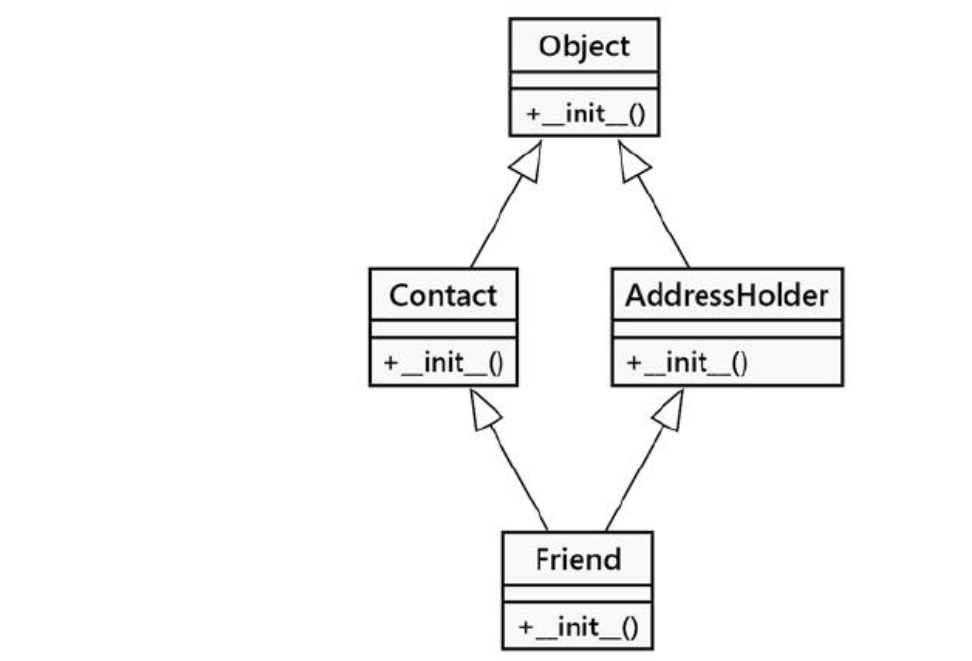

La méthode __init__() de la classe Friend appelle d'abord __init__() sur la classe Contact, qui initialise implicitement la superclasse d'objet (rappelez-vous, toutes les classes dérivent de l'objet). 

La classe Friend appelle ensuite __init__() sur AddressHolder, qui initialise implicitement à nouveau la superclasse d'objets. Cela signifie que la classe parente a été configurée deux fois. Avec la classe d'objets, c'est relativement inoffensif, mais dans certaines situations, cela peut mener au désastre. Imaginez que vous essayez de vous connecter à une base de données deux fois pour chaque requête ! La classe de base ne doit être appelée qu'une seule fois. Une fois, oui, mais quand ? Appelons-nous Friend, puis Contact, puis Object, puis AddressHolder ? Ou Friend, puis Contact, puis AddressHolder, puis Object ? 

Imaginons un exemple pour illustrer ce problème plus clairement. Ici, nous avons une classe de base, BaseClass, qui a une méthode nommée call_me(). Deux sous-classes, LeftSubclass et RightSubclass, étendent la classe BaseClass, et chacune remplace la méthode call_me() avec différentes implémentations.

Ensuite, une autre sous-classe étend les deux en utilisant l'héritage multiple avec une quatrième implémentation distincte de la méthode call_me(). C'est ce qu'on appelle l'héritage du diamant en raison de la forme en diamant du diagramme de classes

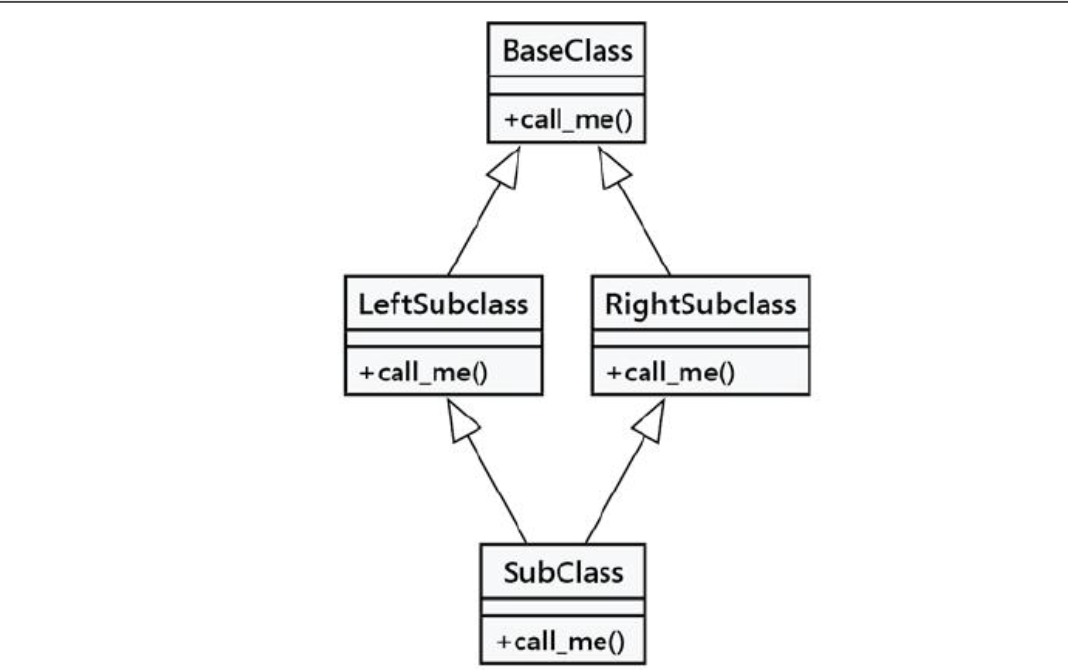

Convertissons ce diagramme en code. Cet exemple montre quand les méthodes sont appelées

In [ ]:
class BaseClass:
    num_base_calls = 0

    def call_me(self) -> None:
        print("Calling method on BaseClass")
        self.num_base_calls += 1


class LeftSubclass(BaseClass):
    num_left_calls = 0

    def call_me(self) -> None:
        BaseClass.call_me(self)
        print("Calling method on LeftSubclass")
        self.num_left_calls += 1


class RightSubclass(BaseClass):
    num_right_calls = 0

    def call_me(self) -> None:
        BaseClass.call_me(self)
        print("Calling method on RightSubclass")
        self.num_right_calls += 1


class Subclass(LeftSubclass, RightSubclass):
    num_sub_calls = 0

    def call_me(self) -> None:
        LeftSubclass.call_me(self)
        RightSubclass.call_me(self)
        print("Calling method on Subclass")
        self.num_sub_calls += 1



Cet exemple garantit que chaque méthode call_me() surchargée appelle directement la méthode parent avec le même nom. Il nous permet de savoir chaque fois qu'une méthode est appelée en imprimant les informations à l'écran. Il crée également une variable d'instance distincte pour montrer combien de fois elle a été appelée

Si nous instancions un objet Subclass et appelons la méthode call_me() dessus une fois, nous obtenons la sortie suivante



In [ ]:
s = Subclass()
s.call_me()

Calling method on BaseClass
Calling method on LeftSubclass
Calling method on BaseClass
Calling method on RightSubclass
Calling method on Subclass


In [ ]:
print(
    s.num_sub_calls,
    s.num_left_calls,
    s.num_right_calls,
    s.num_base_calls
    )

1 1 1 2


Ainsi, nous pouvons voir la méthode call_me() de la classe de base appelée deux fois. Cela pourrait conduire à des bugs pernicieux si cette méthode effectue un travail réel, tel que le dépôt sur un compte bancaire, deux fois. 

L'algorithme d'ordre de résolution de méthode (MRO) de Python transforme le diamant en un tuple plat et linéaire. Nous pouvons voir les résultats de cela dans l'attribut __mro__ d'une classe. 

La version linéaire de ce losange est la séquence Subclass, LeftSubclass, RightSubClass, BaseClass, object. Ce qui est important ici, c'est que Subclass répertorie LeftSubclass avant RightSubClass, imposant un ordre aux classes dans le losange. 

La chose à garder à l'esprit avec l'héritage multiple est que nous voulons souvent appeler la méthode suivante dans la séquence MRO, pas nécessairement une méthode de la classe parent. La fonction super() localise le nom dans la séquence MRO. En effet, super() a été développé à l'origine pour rendre possibles des formes complexes d'héritage multiple. Voici le même code écrit en utilisant super(). Nous avons renommé certaines classes, en ajoutant un _S pour qu'il soit clair qu'il s'agit de la version utilisant super()

In [ ]:
class BaseClass:
    num_base_calls = 0

    def call_me(self) -> None:
        print("Calling method on BaseClass")
        self.num_base_calls += 1

class LeftSubclass_S(BaseClass):
    num_left_calls = 0

    def call_me(self) -> None:
        super().call_me()
        print("Calling method on LeftSubclass_S")
        self.num_left_calls += 1


class RightSubclass_S(BaseClass):
    num_right_calls = 0

    def call_me(self) -> None:
        super().call_me()
        print("Calling method on RightSubclass_S")
        self.num_right_calls += 1


class Subclass_S(LeftSubclass_S, RightSubclass_S):
    num_sub_calls = 0

    def call_me(self) -> None:
        super().call_me()
        print("Calling method on Subclass_S")
        self.num_sub_calls += 1

Le changement est assez mineur; nous avons seulement remplacé les appels directs naïfs par des appels à super(). La classe Subclass_S, au bas du losange, n'appelle qu'une seule fois super() plutôt que d'avoir à faire les appels à la fois pour la gauche et la droite. Le changement est assez facile, mais regardez la différence lorsque nous l'exécutons

In [ ]:
ss = Subclass_S()
ss.call_me()

Calling method on BaseClass
Calling method on RightSubclass_S
Calling method on LeftSubclass_S
Calling method on Subclass_S


In [ ]:
print(
    ss.num_sub_calls,
    ss.num_left_calls,
    ss.num_right_calls, 
    ss.num_base_calls)

1 1 1 1


In [ ]:
from pprint import pprint

pprint(Subclass_S.__mro__)

(<class '__main__.Subclass_S'>,
 <class '__main__.LeftSubclass_S'>,
 <class '__main__.RightSubclass_S'>,
 <class '__main__.BaseClass'>,
 <class 'object'>)


L'ordre des classes montre quel ordre super() utilisera. La dernière classe du tuple est généralement la classe d'objets intégrée. Comme indiqué plus haut dans ce guide, c'est la superclasse implicite de toutes les classes. Cela montre ce que super() fait réellement. 

Étant donné que les instructions d'impression sont exécutées après les super appels, la sortie imprimée est dans l'ordre où chaque méthode est réellement exécutée. Regardons la sortie de l'arrière vers l'avant pour voir qui appelle quoi:

* 1. Nous commençons par la méthode Subclass_S.call_me(). Cela évalue super().call_me(). Le MRO affiche LeftSubclass_S comme next.

* 2. Nous commençons l'évaluation de la méthode LeftSubclass_S.call_me(). Cela évalue super().call_me(). Le MRO met RightSubclass_S comme suivant. Ce n'est pas une superclasse ; il est adjacent dans la classe diamond.

* 3. L'évaluation de la méthode RightSubclass_S.call_me(), super().call_me(). Cela conduit à BaseClass.

* 4. La méthode BaseClass.call_me() termine son traitement : impression d'un message et définition d'une variable d'instance, self.num_base_calls, sur BaseClass.num_base_calls + 1.

* 5. Ensuite, la méthode RightSubclass_S.call_me() peut se terminer en affichant un message et en définissant une variable d'instance, self.num_right_calls.

* 6. Ensuite, la méthode LeftSubclass_S.call_me() terminera en imprimant un message et en définissant une variable d'instance, self.num_left_calls.

* 7. Cela sert à préparer le terrain pour que Subclass_S termine le traitement de sa méthode call_me(). Il écrit un message, définit une variable d'instance et se repose, heureux et avec succès. 

Faites particulièrement attention à ceci : le super appel n'appelle pas la méthode sur la superclasse de LeftSubclass_S (qui est BaseClass). Au contraire, il appelle RightSubclass_S, même s'il n'est pas un parent direct de LeftSubclass_S ! C'est la classe suivante dans le MRO, pas la méthode parent. RightSubclass_S appelle ensuite BaseClass et les appels super() ont assuré que chaque méthode de la hiérarchie des classes est exécutée une fois

## Polymorphisme

Nous avons été initiés au polymorphisme au guide 1, Conception Orientée Objet. C'est un nom voyant décrivant un concept simple : différents comportements se produisent selon la sous-classe utilisée, sans avoir à savoir explicitement ce qu'est réellement la sous-classe. Il est aussi parfois appelé le principe de substitution de Liskov, en l'honneur des contributions de Barbara Liskov à la programmation orientée objet. 

Nous devrions pouvoir substituer n'importe quelle sous-classe à sa super-classe. Par exemple, imaginez un programme qui lit des fichiers audio. Un lecteur multimédia peut avoir besoin de charger un objet AudioFile, puis de le lire. Nous pouvons mettre une méthode play() sur l'objet, qui est chargée de décompresser ou d'extraire l'audio et de l'acheminer vers la carte son et les haut-parleurs. 

L'acte de lire un fichier audio pourrait être aussi simple que : 

    fichier_audio.play() 
    
Cependant, le processus de décompression et d'extraction d'un fichier audio est très différent pour différents types de fichiers. Alors que les fichiers .wav sont stockés non compressés, les fichiers .mp3, .wma et .ogg utilisent tous des algorithmes de compression totalement différents. 

Nous pouvons utiliser l'héritage avec polymorphisme pour simplifier la conception. Chaque type de fichier peut être représenté par une sous-classe différente de AudioFile, par exemple, WavFile et MP3File. Chacun d'eux aurait une méthode play() qui serait implémentée différemment pour chaque fichier afin de garantir que la procédure d'extraction correcte est suivie. 

L'objet lecteur multimédia n'aurait jamais besoin de savoir à quelle sous-classe d'AudioFile il fait référence ; il appelle simplement play() et laisse polymorphe l'objet s'occuper des détails réels de la lecture. Regardons un squelette rapide montrant comment cela pourrait fonctionner

In [ ]:
from __future__ import annotations
from pathlib import Path



class Playable():
    def play(self) -> None:
        ...


class AudioFile(Playable):
    ext: str

    def __init__(self, filepath: Path) -> None:
        if not filepath.suffix == self.ext:
            raise ValueError("Invalid file format")
        self.filepath = filepath


class MP3File(AudioFile):
    ext = ".mp3"

    def play(self) -> None:
        print(f"playing {self.filepath} as mp3")


class WavFile(AudioFile):
    ext = ".wav"

    def play(self) -> None:
        print(f"playing {self.filepath} as wav")


class OggFile(AudioFile):
    ext = ".ogg"

    def play(self) -> None:
        print(f"playing {self.filepath} as ogg")


Tous les fichiers audio vérifient qu'une extension valide a été donnée lors de l'initialisation. 

Si le nom de fichier ne se termine pas par le nom correct, il lève une exception (les exceptions seront couvertes en détail au guide 4, Attendre l'inattendu). 

Mais avez-vous remarqué comment la méthode __init__() dans la classe parente est capable d'accéder à la variable de classe ext à partir de différentes sous-classes ? 

C'est le polymorphisme à l'œuvre. La classe parent AudioFile a simplement un indice de type expliquant à mypy qu'il y aura un attribut nommé ext. Il ne stocke pas réellement une référence à l'attribut ext. Lorsque la méthode héritée est utilisée par une sous-classe, alors la définition de la sous-classe de l'attribut ext est utilisée. 

L'indice de type peut aider mypy à repérer une classe à laquelle il manque l'attribution d'attribut. De plus, chaque sous-classe d'AudioFile implémente play() d'une manière différente (cet exemple ne joue pas réellement la musique ; les algorithmes de compression audio méritent vraiment un livre séparé !) .

 C'est aussi le polymorphisme en action. Le lecteur multimédia peut utiliser exactement le même code pour lire un fichier, quel que soit son type ; il ne se soucie pas de la sous-classe d'AudioFile qu'il regarde. Les détails de la décompression du fichier audio sont encapsulés. Si nous testons cet exemple, cela fonctionne comme nous l'espérons :

In [ ]:
p_1 = MP3File(Path("Heart of the Sunrise.mp3"))

p_1.play()

playing Heart of the Sunrise.mp3 as mp3


In [ ]:
p_2 = WavFile(Path("Roundabout.wav"))
p_2.play()

playing Roundabout.wav as wav


In [ ]:
p_3 = OggFile(Path("Heart of the Sunrise.ogg"))
p_3.play()

playing Heart of the Sunrise.ogg as ogg


In [ ]:
p_4 = MP3File(Path("The Fish.mov"))

ValueError: ignored

Voyez comment AudioFile.__init__() peut vérifier le type de fichier sans vraiment savoir à quelle sous-classe il fait référence ? Le polymorphisme est en fait l'une des choses les plus intéressantes de la programmation orientée objet, et il rend évidentes certaines conceptions de programmation qui n'étaient pas possibles paradigmes antérieurs. 

Cependant, Python rend le polymorphisme moins impressionnant à cause du typage canard. Le typage de canard en Python nous permet d'utiliser n'importe quel objet qui fournit le comportement requis sans le forcer à être une sous-classe. 

La nature dynamique de Python rend cela trivial. L'exemple suivant n'étend pas AudioFile, mais il peut être utilisé en Python en utilisant exactement la même interface

In [ ]:
class FlacFile(Playable):
    def __init__(self, filepath: Path) -> None:
        if not filepath.suffix == ".flac":
            raise ValueError("Not a .flac file")
        self.filepath = filepath

    def play(self) -> None:
        print(f"playing {self.filepath} as flac")

Notre lecteur multimédia peut lire les objets de la classe FlacFile aussi facilement que les objets des classes qui étendent AudioFile.

 Le polymorphisme est l'une des raisons les plus importantes d'utiliser l'héritage dans de nombreux contextes orientés objet. Parce que tous les objets qui fournissent l'interface correcte peuvent être utilisés de manière interchangeable en Python, cela réduit le besoin de superclasses communes polymorphes. L'héritage peut toujours être utile pour partager du code, mais si tout ce qui est partagé est l'interface publique, il suffit de taper duck